In [1]:
import pandas as pd

pct_df = pd.read_excel('/Users/ijunhui/Downloads/ubion/Project1-다줘페이/data/카드총액증감율09~22.xlsx')
pct_df = pct_df.dropna()

pct_df.columns = pct_df.columns.str.replace(" ", "")
pct_df = pct_df.rename(columns={'소비유형코드' : '날짜'})
# pct_df['날짜'] = pd.to_datetime(pct_df["날짜"], format='%Y/%M') 
# pct_df['날짜'] = pct_df["날짜"].dt.strftime('%Y%m')   
# 

pct_df['날짜'] = pct_df['날짜'].str.replace("/", "")
pct_df = pct_df.set_index(keys='날짜')
pct_df

,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인및전문서비스,금융/보험
날짜,,,,,,,,,,,,,,,
201001,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,-14.5,-7.1,-12.8,-13.7,4.6,-11.0
201002,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,-6.2,1.2,-19.1,-9.7,-7.9,-4.2
201003,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,54.4,16.4,11.7,23.0,3.2,24.2
201004,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,-30.9,-15.8,20.8,-2.9,3.4,-14.2
201005,2.0,9.7,9.5,-1.7,5.1,-4.2,-4.0,5.3,12.4,-5.8,9.9,6.7,9.0,-3.9,-3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202112,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,18.6,4.0,-0.2,-8.6,8.7,5.3
202201,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,-5.1,3.2,-4.0,-6.1,19.6,-7.0
202202,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,-16.4,-8.3,-7.1,-17.4,-24.0,-5.0


In [2]:
spi = pd.read_excel('/Users/ijunhui/Downloads/ubion/Project1-다줘페이/data/소비판매지수09~22.xlsx')
spi = spi.iloc[:-1]
spi['지수등락'] = spi['총지수'].pct_change() *100
spi = spi.dropna()
spi = spi[['시점', '지수등락']]
spi = spi.rename(columns={'시점':'날짜'})
spi['날짜'] = spi['날짜'].str.replace(".", "")
  
spi = spi.set_index(keys='날짜')

spi

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/3645811186.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  spi['날짜'] = spi['날짜'].str.replace(".", "")


,지수등락
날짜,
201001,-9.508197
201002,-1.690821
201003,5.405405
201004,-1.864802
201005,4.275534
...,...
202112,2.004812
202201,-7.625786
202202,-8.170213


In [3]:
df = pd.merge(pct_df, spi, how = 'left', on = pct_df.index)
df = df.rename(columns={'key_0' : '날짜'})
df = df.rename(columns={'지수등락' : '소매판매지수'})

book_df = df[['날짜', '서적/문구', '소매판매지수']]
book_df

,날짜,서적/문구,소매판매지수
0,201001,-14.5,-9.508197
1,201002,-6.2,-1.690821
2,201003,54.4,5.405405
3,201004,-30.9,-1.864802
4,201005,-5.8,4.275534
...,...,...,...
143,202112,18.6,2.004812
144,202201,-5.1,-7.625786
145,202202,-16.4,-8.170213
146,202203,40.3,13.067655


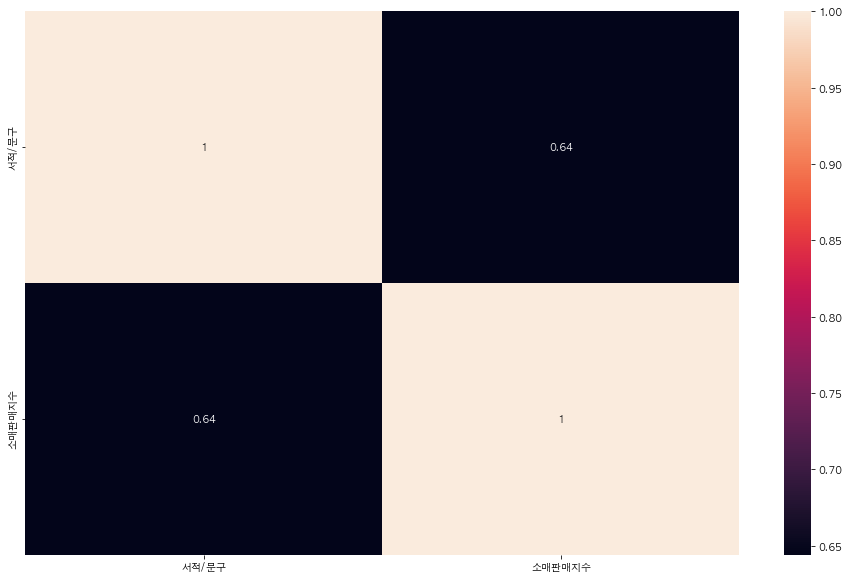

In [4]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(book_df.corr(), annot=True)

plt.show()

In [5]:
# book_df["날짜"] = pd.to_datetime(book_df["날짜"], format='%Y%m')     # 데이터 타입 datetime으로 변경
# book_df["날짜"] = book_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
# book_df.set_index("날짜", inplace=True)                              # 날짜 컬럼 인덱스 설정

In [6]:
book_df[["소비"]] = "" 
book_df

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/2359539253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df[["소비"]] = ""


,날짜,서적/문구,소매판매지수,소비
0,201001,-14.5,-9.508197,
1,201002,-6.2,-1.690821,
2,201003,54.4,5.405405,
3,201004,-30.9,-1.864802,
4,201005,-5.8,4.275534,
...,...,...,...,...
143,202112,18.6,2.004812,
144,202201,-5.1,-7.625786,
145,202202,-16.4,-8.170213,
146,202203,40.3,13.067655,


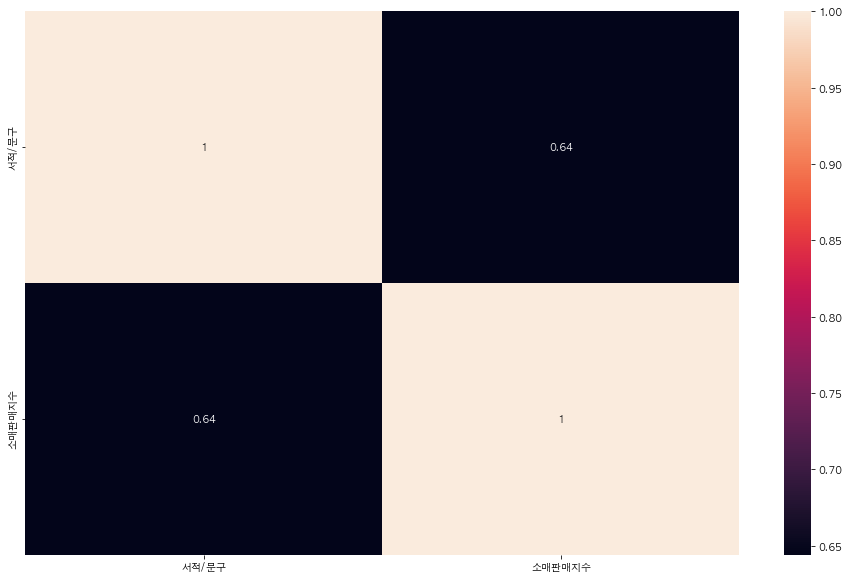

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(book_df.corr(), annot=True)

plt.show()

In [8]:
book_df[book_df["소비"]==""]

,날짜,서적/문구,소매판매지수,소비
0,201001,-14.5,-9.508197,
1,201002,-6.2,-1.690821,
2,201003,54.4,5.405405,
3,201004,-30.9,-1.864802,
4,201005,-5.8,4.275534,
...,...,...,...,...
143,202112,18.6,2.004812,
144,202201,-5.1,-7.625786,
145,202202,-16.4,-8.170213,
146,202203,40.3,13.067655,


In [9]:
# book_df["날짜"] = pd.to_datetime(book_df["날짜"], format='%Y/%m')     # 데이터 타입 datetime으로 변경
# book_df["날짜"] = book_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
# # book_df.set_index("날짜", inplace=True)   


In [10]:
book_df['날짜'] = book_df['날짜'].astype(str)

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/2950536731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['날짜'] = book_df['날짜'].astype(str)


In [11]:
book_df['월'] = book_df['날짜'].str[-2:]
book_df['월'] = book_df['월'].astype(int)
book_df

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/3967023149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['월'] = book_df['날짜'].str[-2:]
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/3967023149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['월'] = book_df['월'].astype(int)


,날짜,서적/문구,소매판매지수,소비,월
0,201001,-14.5,-9.508197,,1
1,201002,-6.2,-1.690821,,2
2,201003,54.4,5.405405,,3
3,201004,-30.9,-1.864802,,4
4,201005,-5.8,4.275534,,5
...,...,...,...,...,...
143,202112,18.6,2.004812,,12
144,202201,-5.1,-7.625786,,1
145,202202,-16.4,-8.170213,,2
146,202203,40.3,13.067655,,3


In [12]:
book_m = book_df.groupby('월').mean()
book_m

,서적/문구,소매판매지수
월,,
1,-9.446154,-6.858107
2,-7.723077,-6.870708
3,40.161538,10.189673
4,-23.476923,-1.704188
5,-1.708333,4.921439
6,-4.941667,-3.555443
7,11.325000,0.622371
8,-6.008333,-2.609243
9,3.391667,4.595584


In [13]:
# 월 등락률 평균
book_m = book_df.groupby('월').mean()
book_m_m = []
sri_m_m = []
for i in range(1, 12):
    book_m_m.append(book_m[book_m.index == i]['서적/문구'])
    sri_m_m.append(book_m[book_m.index == i]['소매판매지수'])

print(book_m_m[0])
print(sri_m_m[0])
print(book_m[book_m.index == 1]['서적/문구'])

월
1   -9.446154
Name: 서적/문구, dtype: float64
월
1   -6.858107
Name: 소매판매지수, dtype: float64
월
1   -9.446154
Name: 서적/문구, dtype: float64


In [14]:
year = 13
book_u = []
book_d = []
sri_u = []
sri_d = []
all_book_u = book_df['서적/문구'][book_df['서적/문구']>0].mean()
all_book_d = book_df['서적/문구'][book_df['서적/문구']<0].mean()
all_sri_u = book_df['소매판매지수'][book_df['소매판매지수']>0].mean()
all_sri_d = book_df['소매판매지수'][book_df['소매판매지수']<0].mean()

for i in range(0, 86 ,12):
    b_u = book_df.loc[i:i+11][book_df['서적/문구'] > 0]
    b_d = book_df.loc[i:i+11][book_df['서적/문구'] < 0]
    s_u = book_df.loc[i:i+11][book_df['소매판매지수'] > 0]
    s_d = book_df.loc[i:i+11][book_df['소매판매지수'] < 0]
    
    book_u.insert(year, b_u['서적/문구'].mean())
    book_d.insert(year, b_d['서적/문구'].mean())
    sri_u.insert(year, s_u['소매판매지수'].mean())
    sri_d.insert(year, s_d['소매판매지수'].mean())

print("상승 등락: ", book_u)
print("하락 등락 : ", book_d)
print("지수 상승 등락 평균 : ", sri_u)
print("지수 하강 등락 평균 : ", sri_d)
print("전체 상승 등락 : ", all_book_u)
print("전체 하강 등락 : ", all_book_d)
print("전체 지수 상승 : ", all_sri_u)
print("전체 지수 하강 : ", all_sri_d)

#리스트[0] = book_df[0:11]
#리스트[1] = book_df[12:23]
#리스트[2] = book_df[24:35]
#리스트[3] = book_df[36:47]
#리스트[4] = book_df[48:59]
#리스트[5] = book_df[60:71]
#리스트[6] = book_df[72:83]



상승 등락:  [16.55, 19.479999999999997, 12.299999999999999, 16.54, 17.0, 25.049999999999997, 15.88, 17.08]
하락 등락 :  [-12.149999999999999, -9.671428571428573, -12.049999999999999, -9.5, -9.8, -9.424999999999999, -9.214285714285714, -9.928571428571429]
지수 상승 등락 평균 :  [3.4148156349332814, 5.4763364533239045, 4.616846083457541, 3.522166779600067, 4.271365513251891, 4.540162231170582, 4.071448435156551, 5.904687339697099]
지수 하강 등락 평균 :  [-3.7789309573435474, -3.249761610257519, -4.0083281586653134, -4.656922424514482, -4.613775629638037, -4.419418389955343, -3.516958705148219, -3.7366209542979223]
전체 상승 등락 :  15.917741935483871
전체 하강 등락 :  -9.310465116279067
전체 지수 상승 :  4.334180837747845
전체 지수 하강 :  -4.209304470550225


/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/3140752197.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b_u = book_df.loc[i:i+11][book_df['서적/문구'] > 0]
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/3140752197.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b_d = book_df.loc[i:i+11][book_df['서적/문구'] < 0]
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/3140752197.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_u = book_df.loc[i:i+11][book_df['소매판매지수'] > 0]
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/3140752197.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_d = book_df.loc[i:i+11][book_df['소매판매지수'] < 0]


In [15]:
print("상승 등락: ", book_u)
print("하락 등락 : ", book_d)
print("지수 상승 등락 평균 : ", sri_u)
print("지수 하강 등락 평균 : ", sri_d)
print("전체 상승 등락 : ", all_book_u)
print("전체 하강 등락 : ", all_book_d)
print("전체 지수 상승 : ", all_sri_u)
print("전체 지수 하강 : ", all_sri_d)

상승 등락:  [16.55, 19.479999999999997, 12.299999999999999, 16.54, 17.0, 25.049999999999997, 15.88, 17.08]
하락 등락 :  [-12.149999999999999, -9.671428571428573, -12.049999999999999, -9.5, -9.8, -9.424999999999999, -9.214285714285714, -9.928571428571429]
지수 상승 등락 평균 :  [3.4148156349332814, 5.4763364533239045, 4.616846083457541, 3.522166779600067, 4.271365513251891, 4.540162231170582, 4.071448435156551, 5.904687339697099]
지수 하강 등락 평균 :  [-3.7789309573435474, -3.249761610257519, -4.0083281586653134, -4.656922424514482, -4.613775629638037, -4.419418389955343, -3.516958705148219, -3.7366209542979223]
전체 상승 등락 :  15.917741935483871
전체 하강 등락 :  -9.310465116279067
전체 지수 상승 :  4.334180837747845
전체 지수 하강 :  -4.209304470550225


In [16]:
book_df[book_df['월'] == 7]

,날짜,서적/문구,소매판매지수,소비,월
6,201007,4.8,1.393728,,7
18,201107,11.1,-0.437637,,7
30,201207,12.3,1.941748,,7
42,201307,16.0,2.253219,,7
54,201407,19.2,2.010582,,7
66,201507,19.0,3.052632,,7
78,201607,14.5,-1.257253,,7
90,201707,10.9,0.671785,,7
102,201807,10.1,1.931923,,7
114,201907,7.8,0.454545,,7


In [17]:
book_m


,서적/문구,소매판매지수
월,,
1,-9.446154,-6.858107
2,-7.723077,-6.870708
3,40.161538,10.189673
4,-23.476923,-1.704188
5,-1.708333,4.921439
6,-4.941667,-3.555443
7,11.325000,0.622371
8,-6.008333,-2.609243
9,3.391667,4.595584


In [18]:
# print("상승 등락: ", book_u)
# print("하락 등락 : ", book_d)
# print("지수 상승 등락 평균 : ", sri_u)
# print("지수 하강 등락 평균 : ", sri_d)
# print("전체 상승 등락 : ", all_book_u)
# print("전체 하강 등락 : ", all_book_d)
# print("전체 지수 상승 : ", all_sri_u)
# print("전체 지수 하강 : ", all_sri_d)
# 단순 등락들은 리스트 0~6 첫1년:13년도 ~ 7년 : 19년도
# (a[int(j/12)])

import numpy as np

book_df["날짜"] = book_df["날짜"].astype(str)
book_df["소비"] = ""

for i in range(0,len(book_df) ):
    #1차 노드
    if book_m['서적/문구'][book_m.index == book_df.loc[i,'월']].values > 0:
        #2차 노드
        if book_df.loc[i, '서적/문구'] > 0:
            #3차 노드
            if book_df.loc[i, '서적/문구'] > book_m['서적/문구'][book_m.index == book_df.loc[i,'월']].values:
                book_df.loc[i,"소비"] = 1
            elif book_df.loc[i, '서적/문구'] < book_m['서적/문구'][book_m.index == book_df.loc[i,'월']].values:
                if book_df.loc[i,"소매판매지수"] > book_m['소매판매지수'][book_m.index == book_df.loc[i,'월']].values:
                    book_df.loc[i, '소비'] = 1
                else:
                    book_df.loc[i, '소비'] = 0
        elif book_df.loc[i, '서적/문구'] < 0:
            if book_df.loc[i,"소매판매지수"] < 0:
                book_df.loc[i, '소비'] = 0
            elif book_df.loc[i,"소매판매지수"] > 0:
                if book_df.loc[i,"소매판매지수"] > book_m['소매판매지수'][book_m.index == book_df.loc[i,'월']].values:
                    book_df.loc[i, '소비'] = 1
                else:
                    book_df.loc[i, '소비'] = 0
            else:
                book_df.loc[i, '소비'] = 0
    elif book_m['서적/문구'][book_m.index == book_df.loc[i,'월']].values < 0:
        if book_df.loc[i, '서적/문구'] < 0:
            if book_df.loc[i, '서적/문구'] < book_m['서적/문구'][book_m.index == book_df.loc[i,'월']].values:
                book_df.loc[i, '소비'] = 0
            elif book_df.loc[i, '서적/문구'] > book_m['서적/문구'][book_m.index == book_df.loc[i,'월']].values:
                if book_df.loc[i, '서적/문구'] < 0:
                    book_df.loc[i, '소비'] = 0
                elif book_df.loc[i,"소매판매지수"] < book_m['소매판매지수'][book_m.index == book_df.loc[i,'월']].values:
                    book_df.loc[i, '소비'] = 1
                else:
                    book_df.loc[i, '소비'] = 0
        elif book_df.loc[i, '서적/문구'] > 0:
            if book_df.loc[i,"소매판매지수"] > 0:
                book_df.loc[i, '소비'] = 1
            elif book_df.loc[i,"소매판매지수"] < 0:
                if book_df.loc[i,"소매판매지수"] < book_m['소매판매지수'][book_m.index == book_df.loc[i,'월']].values:
                    book_df.loc[i, '소비'] = 0
                else:
                    book_df.loc[i, '소비'] = 1



/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/1454126612.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df["날짜"] = book_df["날짜"].astype(str)
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/1454126612.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df["소비"] = ""


In [19]:
book_df.groupby('월').mean()

,서적/문구,소매판매지수
월,,
1,-9.446154,-6.858107
2,-7.723077,-6.870708
3,40.161538,10.189673
4,-23.476923,-1.704188
5,-1.708333,4.921439
6,-4.941667,-3.555443
7,11.325000,0.622371
8,-6.008333,-2.609243
9,3.391667,4.595584


In [20]:
book_df[book_df['월']==12]

,날짜,서적/문구,소매판매지수,소비,월
11,201012,25.0,3.594771,1,12
23,201112,18.3,4.380342,1,12
35,201212,11.8,2.358974,1,12
47,201312,16.8,1.215805,0,12
59,201412,14.2,5.200000,1,12
71,201512,28.1,2.539981,1,12
83,201612,16.4,1.924840,1,12
95,201712,18.0,-1.826087,1,12
107,201812,16.0,0.172117,0,12
119,201912,12.2,0.996678,0,12


In [21]:
book_df.groupby('월').mean()

,서적/문구,소매판매지수
월,,
1,-9.446154,-6.858107
2,-7.723077,-6.870708
3,40.161538,10.189673
4,-23.476923,-1.704188
5,-1.708333,4.921439
6,-4.941667,-3.555443
7,11.325000,0.622371
8,-6.008333,-2.609243
9,3.391667,4.595584


In [22]:
book_m['서적/문구'][book_m.index == book_df.loc[1,'월']].values

array([-7.72307692])

In [23]:

import pandas as pd 

pd.set_option('display.max_rows', None)

In [24]:
book_df

,날짜,서적/문구,소매판매지수,소비,월
0,201001,-14.5,-9.508197,0,1
1,201002,-6.2,-1.690821,0,2
2,201003,54.4,5.405405,1,3
3,201004,-30.9,-1.864802,0,4
4,201005,-5.8,4.275534,0,5
5,201006,8.0,-1.936219,1,6
6,201007,4.8,1.393728,1,7
7,201008,-7.4,-3.894616,0,8
8,201009,1.9,6.793802,1,9
9,201010,-8.1,1.227679,0,10


In [25]:
book_df['소비'] = book_df['소비'].astype(int)

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/857023347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['소비'] = book_df['소비'].astype(int)


In [26]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      148 non-null    object 
 1   서적/문구   148 non-null    float64
 2   소매판매지수  148 non-null    float64
 3   소비      148 non-null    int64  
 4   월       148 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.0+ KB


In [27]:
data = book_df[['날짜', '월', '서적/문구', '소매판매지수']]
target = book_df['소비']

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

In [30]:
ss.fit(data)

StandardScaler()

In [31]:
data_scaled = ss.transform(data)

In [32]:
params = {'C' : [0, 0.1, 1, 10, 20]}

In [33]:
lr = LogisticRegression()
rg = Ridge()
ls = Lasso()
logisticreg = LogisticRegression()
detreec = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
# xgb = XGBClassifier()

In [34]:
splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
scores_logistic = cross_validate(lr, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_ridge = cross_validate(rg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_lasso = cross_validate(ls, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dectree = cross_validate(detreec, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_xgb = cross_validate(xgb, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [35]:
print('로지스틱 train data score : ',np.mean(scores_logistic['train_score'])) 
print('로지스틱 test data score : ',np.mean(scores_logistic['test_score']))  
print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) 
print('릿지 test data score : ',np.mean(scores_ridge['test_score']))  
print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) 
print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) 
print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))
# print('XGB train data score : ',np.mean(scores_xgb['train_score']))
# print('XGB test data score : ',np.mean(scores_xgb['test_score']))

로지스틱 train data score :  0.8608160678380977
로지스틱 test data score :  0.8444444444444446
릿지 train data score :  0.5151677568939942
릿지 test data score :  0.49671909952847865
라쏘 train data score :  0.4500998891215621
라쏘 test data score :  0.4422211873577466
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.8455555555555555
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.8786111111111112


In [36]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=9)

In [37]:
df_clf = DecisionTreeClassifier()


In [38]:
df_clf.fit(X_train, y_train)



DecisionTreeClassifier()

In [39]:

X_pred = df_clf.predict(X_test)

 

In [40]:

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 0.8889


<function matplotlib.pyplot.show(close=None, block=None)>

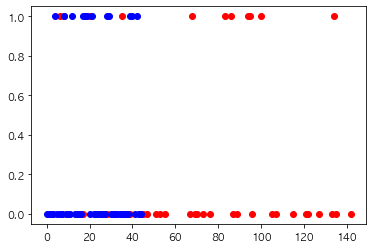

In [41]:
plt.plot(y_test, 'o',c='red')
plt.plot(X_pred, 'o',c='blue')
plt.show

In [42]:
book_df.columns

Index(['날짜', '서적/문구', '소매판매지수', '소비', '월'], dtype='object')

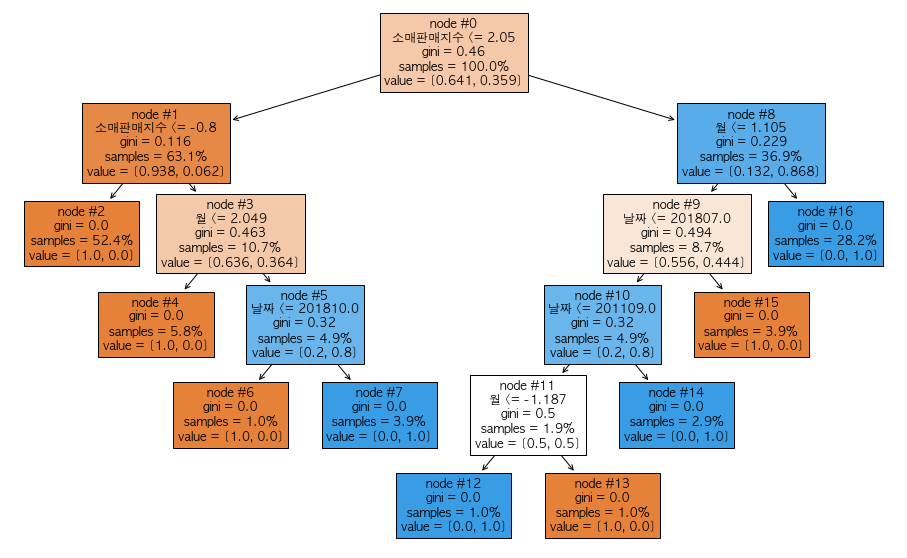

In [43]:
from sklearn.tree import plot_tree
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

feature_names = ['날짜', '서적/문구', '소매판매지수', '월']
# data = book_df[['날짜', '월', '서적/문구', '소매판매지수']]
# target = book_df['소비']
plt.figure(figsize=(16,10))
plot_tree(df_clf, filled=True, feature_names=feature_names, node_ids=True, proportion=True)
plt.show()

In [44]:
df_clf.feature_importances_


array([0.10638366, 0.        , 0.70949277, 0.18412358])

<AxesSubplot:title={'center':'피처중요도'}>

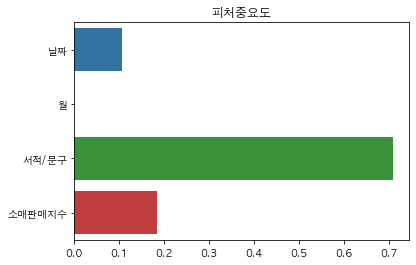

In [45]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.title("피처중요도")
sns.barplot(x=df_clf.feature_importances_, y=data.columns)

In [46]:
# **머신러닝**:

# - Decision Tree
# - Random Forest
# - XGBoost

In [47]:
## 80대 20으로
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=61)


In [48]:
#다른 라이브러리로 비교해보는 것도 좋을 듯

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

be_clf = RandomForestClassifier()
be_clf.fit(X_train, y_train)

pred = be_clf.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, pred)}')
print(f'정밀도 TP/(FP+TP) : {precision_score(y_test, pred)}')
print(f'재현율 TP/(FN+TP) : {recall_score(y_test, pred)}')
## precision과 recall은 상충관계에 있었다? trade off관계?

## 왜 실행떄마다 값이 바뀔까

정확도 : 0.8333333333333334
정밀도 TP/(FP+TP) : 0.7272727272727273
재현율 TP/(FN+TP) : 0.8


In [49]:
from sklearn.metrics import f1_score

print(f'f1 score : {f1_score(y_test, pred)}')


f1 score : 0.761904761904762


In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred_proba = lr_clf.predict_proba(X_test) ## 확률값 리턴 위해
pred = lr_clf.predict(X_test)

#print(pred)
#print(pred_proba) ## 타이타닉 경우의 수 2 생,사
#print(f'shape : {pred_proba.shape}')

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print("두 개의 class중 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])


두 개의 class중 더 큰 확률을 클래스 값으로 예측 
 [[0.27131243 0.72868757 1.        ]
 [0.49844652 0.50155348 1.        ]
 [0.56278708 0.43721292 0.        ]]


In [51]:
from sklearn.metrics import precision_recall_curve
#레이블 값이 1일때의 예측 확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제 데이터 셋과 레이블 값이 1일때 예측확률을 커브 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("반환 분류 결정 임계값 배열의 Shape : ", thresholds.shape)
print("반환된 precisions 배열의 shape : ", precisions.shape)
print("q반환된 recalls 배열의 shape : ", recalls.shape)

print("thresholds 5sample : ", thresholds[:5])
print("precisions 5sample : ", precisions[:5])
print("recalls 5sample : ", recalls[:5])

#반환된 임계값 배열 로우가 147건이니까 샘플로 10건, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print("샘플 추출 위한 임계값 배열의 index 10개 : ", thr_index)
print("샘플용 10개의 임계값 : ", np.round(thresholds[thr_index], 2))

#15step 단위로 추출된 이계값에 따른 정밀도와 재현율 값
print("샘플 임계값별 정밀도 : ", np.round(precisions[thr_index], 3))
print("샘플 임계값별 재현율 : ", np.round(recalls[thr_index], 3))



반환 분류 결정 임계값 배열의 Shape :  (30,)
반환된 precisions 배열의 shape :  (31,)
q반환된 recalls 배열의 shape :  (31,)
thresholds 5sample :  [0.00064911 0.0007782  0.00084815 0.00203164 0.00489169]
precisions 5sample :  [0.33333333 0.34482759 0.35714286 0.37037037 0.38461538]
recalls 5sample :  [1. 1. 1. 1. 1.]
샘플 추출 위한 임계값 배열의 index 10개 :  [ 0 15]
샘플용 10개의 임계값 :  [0.   0.23]
샘플 임계값별 정밀도 :  [0.333 0.667]
샘플 임계값별 재현율 :  [1. 1.]


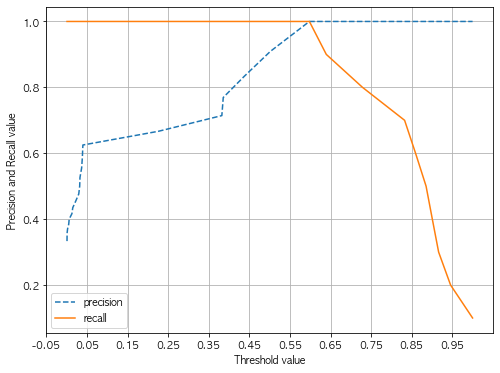

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #x축을 threshold값으로 y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    #threshold 값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

    
    
    

In [53]:
book_df['날짜'] = book_df['날짜'].astype(int)
data = book_df[['날짜', '월', '서적/문구', '소매판매지수']]
target = book_df['소비']


/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50182/2784616320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['날짜'] = book_df['날짜'].astype(int)


In [54]:
#XGBoosting 따로 install해야
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=13)


In [55]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Extreme Gradient Boosting (xgboost) 모델 사용

# 1. 모델 선언
xgb  = XGBClassifier()

# 2. 모델 훈련 fit()함수
xgb.fit(X_train, y_train)

# 3. 모델 예측 predict()함수
y_pred = xgb.predict(X_test)

# 4. score()
#xgb.score(X_train, y_train)
acc = accuracy_score(y_pred, y_test)
print(acc)

## 병렬처리 연산이라 속도가 빠름

0.9666666666666667


<function matplotlib.pyplot.show(close=None, block=None)>

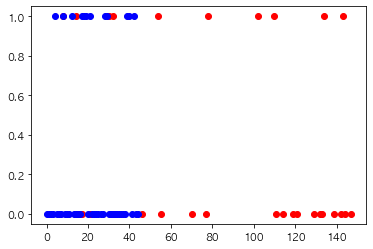

In [56]:
plt.plot(y_test, 'o',c='red')
plt.plot(X_pred, 'o',c='blue')
plt.show

In [57]:
book_train = book_df[0:-13]
book_test = book_df[-13:-1]
book_train

,날짜,서적/문구,소매판매지수,소비,월
0,201001,-14.5,-9.508197,0,1
1,201002,-6.2,-1.690821,0,2
2,201003,54.4,5.405405,1,3
3,201004,-30.9,-1.864802,0,4
4,201005,-5.8,4.275534,0,5
5,201006,8.0,-1.936219,1,6
6,201007,4.8,1.393728,1,7
7,201008,-7.4,-3.894616,0,8
8,201009,1.9,6.793802,1,9
9,201010,-8.1,1.227679,0,10


In [58]:
book_x_train = book_train[['날짜', '서적/문구', '소매판매지수', '월']]
book_y_train = book_train['소비']
book_x_test = book_test[['날짜', '서적/문구', '소매판매지수', '월']]
book_y_test = book_test['소비']


In [59]:
X_train = book_x_train
X_test = book_x_test
y_train = book_y_train
y_test = book_y_test


In [60]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

be_clf = RandomForestClassifier()
be_clf.fit(X_train, y_train)

pred = be_clf.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, pred)}')

정확도 : 0.9166666666666666


In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Extreme Gradient Boosting (xgboost) 모델 사용

# 1. 모델 선언
xgb  = XGBClassifier()

# 2. 모델 훈련 fit()함수
xgb.fit(X_train, y_train)

# 3. 모델 예측 predict()함수
y_pred = xgb.predict(X_test)

# 4. score()
#xgb.score(X_train, y_train)
acc = accuracy_score(y_pred, y_test)
print(acc)

## 병렬처리 연산이라 속도가 빠름

0.9166666666666666


In [62]:
df_clf = DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train, y_train)
X_pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 0.9167


In [64]:
book_df.to_csv('./data/book.csv', index=0)